In [161]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.stats import binned_statistic_2d
from matplotlib.patches import Circle, Rectangle, Arc
import seaborn as sns
from bokeh.plotting import figure, ColumnDataSource
from bokeh.models import HoverTool
from math import pi

In [162]:
chicago = "shot log CHI.csv"

chicago_df = pd.read_csv(chicago)
chicago_df

,self previous shot,player position,home game,location x,opponent previous shot,home team,shot type,points,away team,location y,time,date,shoot player,time from last shot,quarter,current shot outcome
0,NaN,SG,Yes,239.0,NaN,CHI,Jump Shot,2,BOS,169.0,0:17,2016-10-27,Dwyane Wade,NaN,1,SCORED
1,SCORED,PF,Yes,64.0,MISSED,CHI,Hook Shot,2,BOS,215.0,1:08,2016-10-27,Taj Gibson,51.0,1,MISSED
2,MISSED,PG,Yes,67.0,MISSED,CHI,Driving Layup,2,BOS,259.0,1:15,2016-10-27,Rajon Rondo,7.0,1,MISSED
3,MISSED,C,Yes,102.0,MISSED,CHI,Hook Shot,2,BOS,243.0,1:27,2016-10-27,Robin Lopez,12.0,1,MISSED
4,MISSED,SG,Yes,241.0,SCORED,CHI,Jump Shot,2,BOS,210.0,1:57,2016-10-27,Dwyane Wade,30.0,1,MISSED
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7134,SCORED,G,Yes,640.0,MISSED,CHI,Jump Shot,3,BRO,212.0,9:42,2017-04-12,Denzel Valentine,27.0,4,SCORED
7135,SCORED,G,Yes,675.0,MISSED,CHI,Jump Shot,3,BRO,113.0,10:13,2017-04-12,Denzel Valentine,31.0,4,MISSED
7136,MISSED,SG,Yes,848.0,SCORED,CHI,Jump Shot,2,BRO,112.0,10:39,2017-04-12,Anthony Morrow,26.0,4,SCORED
7137,SCORED,PF,Yes,691.0,MISSED,CHI,Jump Shot,3,BRO,99.0,11:10,2017-04-12,Bobby Portis,31.0,4,SCORED


In [163]:
shot_df = chicago_df.rename(columns={"location x": "LOC_Y", "location y": "LOC_X", "player position": "position", "shoot player": "shooter"})
shot_df

,self previous shot,position,home game,LOC_Y,opponent previous shot,home team,shot type,points,away team,LOC_X,time,date,shooter,time from last shot,quarter,current shot outcome
0,NaN,SG,Yes,239.0,NaN,CHI,Jump Shot,2,BOS,169.0,0:17,2016-10-27,Dwyane Wade,NaN,1,SCORED
1,SCORED,PF,Yes,64.0,MISSED,CHI,Hook Shot,2,BOS,215.0,1:08,2016-10-27,Taj Gibson,51.0,1,MISSED
2,MISSED,PG,Yes,67.0,MISSED,CHI,Driving Layup,2,BOS,259.0,1:15,2016-10-27,Rajon Rondo,7.0,1,MISSED
3,MISSED,C,Yes,102.0,MISSED,CHI,Hook Shot,2,BOS,243.0,1:27,2016-10-27,Robin Lopez,12.0,1,MISSED
4,MISSED,SG,Yes,241.0,SCORED,CHI,Jump Shot,2,BOS,210.0,1:57,2016-10-27,Dwyane Wade,30.0,1,MISSED
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7134,SCORED,G,Yes,640.0,MISSED,CHI,Jump Shot,3,BRO,212.0,9:42,2017-04-12,Denzel Valentine,27.0,4,SCORED
7135,SCORED,G,Yes,675.0,MISSED,CHI,Jump Shot,3,BRO,113.0,10:13,2017-04-12,Denzel Valentine,31.0,4,MISSED
7136,MISSED,SG,Yes,848.0,SCORED,CHI,Jump Shot,2,BRO,112.0,10:39,2017-04-12,Anthony Morrow,26.0,4,SCORED
7137,SCORED,PF,Yes,691.0,MISSED,CHI,Jump Shot,3,BRO,99.0,11:10,2017-04-12,Bobby Portis,31.0,4,SCORED


In [164]:
farCourt = shot_df[ shot_df['LOC_Y'] > 470 ].index
# Delete these row indexes from dataFrame
shot_df.drop(farCourt , inplace=True)

In [165]:
shot_df

,self previous shot,position,home game,LOC_Y,opponent previous shot,home team,shot type,points,away team,LOC_X,time,date,shooter,time from last shot,quarter,current shot outcome
0,NaN,SG,Yes,239.0,NaN,CHI,Jump Shot,2,BOS,169.0,0:17,2016-10-27,Dwyane Wade,NaN,1,SCORED
1,SCORED,PF,Yes,64.0,MISSED,CHI,Hook Shot,2,BOS,215.0,1:08,2016-10-27,Taj Gibson,51.0,1,MISSED
2,MISSED,PG,Yes,67.0,MISSED,CHI,Driving Layup,2,BOS,259.0,1:15,2016-10-27,Rajon Rondo,7.0,1,MISSED
3,MISSED,C,Yes,102.0,MISSED,CHI,Hook Shot,2,BOS,243.0,1:27,2016-10-27,Robin Lopez,12.0,1,MISSED
4,MISSED,SG,Yes,241.0,SCORED,CHI,Jump Shot,2,BOS,210.0,1:57,2016-10-27,Dwyane Wade,30.0,1,MISSED
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7084,MISSED,PF,Yes,288.0,SCORED,CHI,Jump Shot,3,BRO,319.0,9:34,2017-04-12,Nikola Mirotic,42.0,2,SCORED
7085,SCORED,PF,Yes,275.0,SCORED,CHI,Jump Shot,3,BRO,339.0,10:02,2017-04-12,Nikola Mirotic,28.0,2,MISSED
7086,MISSED,PG,Yes,102.0,MISSED,CHI,Jump Shot,2,BRO,311.0,10:31,2017-04-12,Rajon Rondo,29.0,2,BLOCKED
7087,BLOCKED,PF,Yes,259.0,SCORED,CHI,Jump Shot,3,BRO,408.0,10:47,2017-04-12,Nikola Mirotic,16.0,2,MISSED


In [177]:
chicago = "shot log CHI2.csv"
chicago2_df = pd.read_csv(chicago)
chicago2_df

,self previous shot,player position,home game,location x,opponent previous shot,home team,shot type,points,away team,location y,time,date,shoot player,time from last shot,quarter,current shot outcome
0,NaN,SG,Yes,239.0,NaN,CHI,Jump Shot,2,BOS,169.0,0:17,2016-10-27,Dwyane Wade,NaN,1,SCORED
1,SCORED,PF,Yes,64.0,MISSED,CHI,Hook Shot,2,BOS,215.0,1:08,2016-10-27,Taj Gibson,51.0,1,MISSED
2,MISSED,PG,Yes,67.0,MISSED,CHI,Driving Layup,2,BOS,259.0,1:15,2016-10-27,Rajon Rondo,7.0,1,MISSED
3,MISSED,C,Yes,102.0,MISSED,CHI,Hook Shot,2,BOS,243.0,1:27,2016-10-27,Robin Lopez,12.0,1,MISSED
4,MISSED,SG,Yes,241.0,SCORED,CHI,Jump Shot,2,BOS,210.0,1:57,2016-10-27,Dwyane Wade,30.0,1,MISSED
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7134,SCORED,G,Yes,640.0,MISSED,CHI,Jump Shot,3,BRO,212.0,9:42,2017-04-12,Denzel Valentine,27.0,4,SCORED
7135,SCORED,G,Yes,675.0,MISSED,CHI,Jump Shot,3,BRO,113.0,10:13,2017-04-12,Denzel Valentine,31.0,4,MISSED
7136,MISSED,SG,Yes,848.0,SCORED,CHI,Jump Shot,2,BRO,112.0,10:39,2017-04-12,Anthony Morrow,26.0,4,SCORED
7137,SCORED,PF,Yes,691.0,MISSED,CHI,Jump Shot,3,BRO,99.0,11:10,2017-04-12,Bobby Portis,31.0,4,SCORED


In [178]:
far_df = chicago2_df.rename(columns={"location x": "LOC_X", "location y": "LOC_Y", "player position": "position", "shoot player": "shooter"})
far_df

,self previous shot,position,home game,LOC_X,opponent previous shot,home team,shot type,points,away team,LOC_Y,time,date,shooter,time from last shot,quarter,current shot outcome
0,NaN,SG,Yes,239.0,NaN,CHI,Jump Shot,2,BOS,169.0,0:17,2016-10-27,Dwyane Wade,NaN,1,SCORED
1,SCORED,PF,Yes,64.0,MISSED,CHI,Hook Shot,2,BOS,215.0,1:08,2016-10-27,Taj Gibson,51.0,1,MISSED
2,MISSED,PG,Yes,67.0,MISSED,CHI,Driving Layup,2,BOS,259.0,1:15,2016-10-27,Rajon Rondo,7.0,1,MISSED
3,MISSED,C,Yes,102.0,MISSED,CHI,Hook Shot,2,BOS,243.0,1:27,2016-10-27,Robin Lopez,12.0,1,MISSED
4,MISSED,SG,Yes,241.0,SCORED,CHI,Jump Shot,2,BOS,210.0,1:57,2016-10-27,Dwyane Wade,30.0,1,MISSED
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7134,SCORED,G,Yes,640.0,MISSED,CHI,Jump Shot,3,BRO,212.0,9:42,2017-04-12,Denzel Valentine,27.0,4,SCORED
7135,SCORED,G,Yes,675.0,MISSED,CHI,Jump Shot,3,BRO,113.0,10:13,2017-04-12,Denzel Valentine,31.0,4,MISSED
7136,MISSED,SG,Yes,848.0,SCORED,CHI,Jump Shot,2,BRO,112.0,10:39,2017-04-12,Anthony Morrow,26.0,4,SCORED
7137,SCORED,PF,Yes,691.0,MISSED,CHI,Jump Shot,3,BRO,99.0,11:10,2017-04-12,Bobby Portis,31.0,4,SCORED


In [180]:
# Get names of indexes for which column Age has value 30
nearCourt = far_df[ far_df['LOC_X'] < 470 ].index
# Delete these row indexes from dataFrame
far_df.drop(nearCourt , inplace=True)

In [181]:
far_df

,self previous shot,position,home game,LOC_X,opponent previous shot,home team,shot type,points,away team,LOC_Y,time,date,shooter,time from last shot,quarter,current shot outcome
47,SCORED,PF,Yes,863.0,SCORED,CHI,Driving Layup,2,BOS,251.0,0:33,2016-10-27,Taj Gibson,NaN,3,MISSED
48,MISSED,C,Yes,887.0,SCORED,CHI,Tip Layup Shot,2,BOS,241.0,0:35,2016-10-27,Robin Lopez,2.0,3,SCORED
49,SCORED,PG,Yes,886.0,SCORED,CHI,Pullup Jump Shot,2,BOS,413.0,1:22,2016-10-27,Rajon Rondo,47.0,3,MISSED
50,MISSED,PF,Yes,706.0,SCORED,CHI,Jump Shot,2,BOS,174.0,1:42,2016-10-27,Taj Gibson,20.0,3,SCORED
51,SCORED,SG,Yes,890.0,MISSED,CHI,Jump Shot,2,BOS,433.0,2:05,2016-10-27,Dwyane Wade,23.0,3,MISSED
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7134,SCORED,G,Yes,640.0,MISSED,CHI,Jump Shot,3,BRO,212.0,9:42,2017-04-12,Denzel Valentine,27.0,4,SCORED
7135,SCORED,G,Yes,675.0,MISSED,CHI,Jump Shot,3,BRO,113.0,10:13,2017-04-12,Denzel Valentine,31.0,4,MISSED
7136,MISSED,SG,Yes,848.0,SCORED,CHI,Jump Shot,2,BRO,112.0,10:39,2017-04-12,Anthony Morrow,26.0,4,SCORED
7137,SCORED,PF,Yes,691.0,MISSED,CHI,Jump Shot,3,BRO,99.0,11:10,2017-04-12,Bobby Portis,31.0,4,SCORED


In [183]:
far_df['LOC_X2'] = far_df.apply(lambda row: (row.LOC_Y - 500) * (-1), axis = 1) 

far_df

,self previous shot,position,home game,LOC_X,opponent previous shot,home team,shot type,points,away team,LOC_Y,time,date,shooter,time from last shot,quarter,current shot outcome,LOC_X2
47,SCORED,PF,Yes,863.0,SCORED,CHI,Driving Layup,2,BOS,251.0,0:33,2016-10-27,Taj Gibson,NaN,3,MISSED,249.0
48,MISSED,C,Yes,887.0,SCORED,CHI,Tip Layup Shot,2,BOS,241.0,0:35,2016-10-27,Robin Lopez,2.0,3,SCORED,259.0
49,SCORED,PG,Yes,886.0,SCORED,CHI,Pullup Jump Shot,2,BOS,413.0,1:22,2016-10-27,Rajon Rondo,47.0,3,MISSED,87.0
50,MISSED,PF,Yes,706.0,SCORED,CHI,Jump Shot,2,BOS,174.0,1:42,2016-10-27,Taj Gibson,20.0,3,SCORED,326.0
51,SCORED,SG,Yes,890.0,MISSED,CHI,Jump Shot,2,BOS,433.0,2:05,2016-10-27,Dwyane Wade,23.0,3,MISSED,67.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7134,SCORED,G,Yes,640.0,MISSED,CHI,Jump Shot,3,BRO,212.0,9:42,2017-04-12,Denzel Valentine,27.0,4,SCORED,288.0
7135,SCORED,G,Yes,675.0,MISSED,CHI,Jump Shot,3,BRO,113.0,10:13,2017-04-12,Denzel Valentine,31.0,4,MISSED,387.0
7136,MISSED,SG,Yes,848.0,SCORED,CHI,Jump Shot,2,BRO,112.0,10:39,2017-04-12,Anthony Morrow,26.0,4,SCORED,388.0
7137,SCORED,PF,Yes,691.0,MISSED,CHI,Jump Shot,3,BRO,99.0,11:10,2017-04-12,Bobby Portis,31.0,4,SCORED,401.0


In [189]:
far_df['distance_from_half'] = far_df.apply(lambda row: (row.LOC_X - 470) * 2, axis = 1) 
far_df

,self previous shot,position,home game,LOC_X,opponent previous shot,home team,shot type,points,away team,LOC_Y,time,date,shooter,time from last shot,quarter,current shot outcome,LOC_X2,distance_from_half,LOC_Y2
47,SCORED,PF,Yes,863.0,SCORED,CHI,Driving Layup,2,BOS,251.0,0:33,2016-10-27,Taj Gibson,NaN,3,MISSED,249.0,786.0,77.0
48,MISSED,C,Yes,887.0,SCORED,CHI,Tip Layup Shot,2,BOS,241.0,0:35,2016-10-27,Robin Lopez,2.0,3,SCORED,259.0,834.0,53.0
49,SCORED,PG,Yes,886.0,SCORED,CHI,Pullup Jump Shot,2,BOS,413.0,1:22,2016-10-27,Rajon Rondo,47.0,3,MISSED,87.0,832.0,54.0
50,MISSED,PF,Yes,706.0,SCORED,CHI,Jump Shot,2,BOS,174.0,1:42,2016-10-27,Taj Gibson,20.0,3,SCORED,326.0,472.0,234.0
51,SCORED,SG,Yes,890.0,MISSED,CHI,Jump Shot,2,BOS,433.0,2:05,2016-10-27,Dwyane Wade,23.0,3,MISSED,67.0,840.0,50.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7134,SCORED,G,Yes,640.0,MISSED,CHI,Jump Shot,3,BRO,212.0,9:42,2017-04-12,Denzel Valentine,27.0,4,SCORED,288.0,340.0,300.0
7135,SCORED,G,Yes,675.0,MISSED,CHI,Jump Shot,3,BRO,113.0,10:13,2017-04-12,Denzel Valentine,31.0,4,MISSED,387.0,410.0,265.0
7136,MISSED,SG,Yes,848.0,SCORED,CHI,Jump Shot,2,BRO,112.0,10:39,2017-04-12,Anthony Morrow,26.0,4,SCORED,388.0,756.0,92.0
7137,SCORED,PF,Yes,691.0,MISSED,CHI,Jump Shot,3,BRO,99.0,11:10,2017-04-12,Bobby Portis,31.0,4,SCORED,401.0,442.0,249.0


In [190]:
far_df['LOC_Y2'] = far_df.LOC_X - far_df.distance_from_half
far_df

,self previous shot,position,home game,LOC_X,opponent previous shot,home team,shot type,points,away team,LOC_Y,time,date,shooter,time from last shot,quarter,current shot outcome,LOC_X2,distance_from_half,LOC_Y2
47,SCORED,PF,Yes,863.0,SCORED,CHI,Driving Layup,2,BOS,251.0,0:33,2016-10-27,Taj Gibson,NaN,3,MISSED,249.0,786.0,77.0
48,MISSED,C,Yes,887.0,SCORED,CHI,Tip Layup Shot,2,BOS,241.0,0:35,2016-10-27,Robin Lopez,2.0,3,SCORED,259.0,834.0,53.0
49,SCORED,PG,Yes,886.0,SCORED,CHI,Pullup Jump Shot,2,BOS,413.0,1:22,2016-10-27,Rajon Rondo,47.0,3,MISSED,87.0,832.0,54.0
50,MISSED,PF,Yes,706.0,SCORED,CHI,Jump Shot,2,BOS,174.0,1:42,2016-10-27,Taj Gibson,20.0,3,SCORED,326.0,472.0,234.0
51,SCORED,SG,Yes,890.0,MISSED,CHI,Jump Shot,2,BOS,433.0,2:05,2016-10-27,Dwyane Wade,23.0,3,MISSED,67.0,840.0,50.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7134,SCORED,G,Yes,640.0,MISSED,CHI,Jump Shot,3,BRO,212.0,9:42,2017-04-12,Denzel Valentine,27.0,4,SCORED,288.0,340.0,300.0
7135,SCORED,G,Yes,675.0,MISSED,CHI,Jump Shot,3,BRO,113.0,10:13,2017-04-12,Denzel Valentine,31.0,4,MISSED,387.0,410.0,265.0
7136,MISSED,SG,Yes,848.0,SCORED,CHI,Jump Shot,2,BRO,112.0,10:39,2017-04-12,Anthony Morrow,26.0,4,SCORED,388.0,756.0,92.0
7137,SCORED,PF,Yes,691.0,MISSED,CHI,Jump Shot,3,BRO,99.0,11:10,2017-04-12,Bobby Portis,31.0,4,SCORED,401.0,442.0,249.0


In [194]:
new_far_df = far_df.drop(columns =['LOC_X', 'LOC_Y'])
new_far_df

,self previous shot,position,home game,opponent previous shot,home team,shot type,points,away team,time,date,shooter,time from last shot,quarter,current shot outcome,LOC_X2,distance_from_half,LOC_Y2
47,SCORED,PF,Yes,SCORED,CHI,Driving Layup,2,BOS,0:33,2016-10-27,Taj Gibson,NaN,3,MISSED,249.0,786.0,77.0
48,MISSED,C,Yes,SCORED,CHI,Tip Layup Shot,2,BOS,0:35,2016-10-27,Robin Lopez,2.0,3,SCORED,259.0,834.0,53.0
49,SCORED,PG,Yes,SCORED,CHI,Pullup Jump Shot,2,BOS,1:22,2016-10-27,Rajon Rondo,47.0,3,MISSED,87.0,832.0,54.0
50,MISSED,PF,Yes,SCORED,CHI,Jump Shot,2,BOS,1:42,2016-10-27,Taj Gibson,20.0,3,SCORED,326.0,472.0,234.0
51,SCORED,SG,Yes,MISSED,CHI,Jump Shot,2,BOS,2:05,2016-10-27,Dwyane Wade,23.0,3,MISSED,67.0,840.0,50.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7134,SCORED,G,Yes,MISSED,CHI,Jump Shot,3,BRO,9:42,2017-04-12,Denzel Valentine,27.0,4,SCORED,288.0,340.0,300.0
7135,SCORED,G,Yes,MISSED,CHI,Jump Shot,3,BRO,10:13,2017-04-12,Denzel Valentine,31.0,4,MISSED,387.0,410.0,265.0
7136,MISSED,SG,Yes,SCORED,CHI,Jump Shot,2,BRO,10:39,2017-04-12,Anthony Morrow,26.0,4,SCORED,388.0,756.0,92.0
7137,SCORED,PF,Yes,MISSED,CHI,Jump Shot,3,BRO,11:10,2017-04-12,Bobby Portis,31.0,4,SCORED,401.0,442.0,249.0


In [200]:
halfcourt_df = new_far_df.rename(columns={"LOC_X2": "LOC_X", "LOC_Y2": "LOC_Y"})
halfcourt_df

,self previous shot,position,home game,opponent previous shot,home team,shot type,points,away team,time,date,shooter,time from last shot,quarter,current shot outcome,LOC_X,distance_from_half,LOC_Y
47,SCORED,PF,Yes,SCORED,CHI,Driving Layup,2,BOS,0:33,2016-10-27,Taj Gibson,NaN,3,MISSED,249.0,786.0,77.0
48,MISSED,C,Yes,SCORED,CHI,Tip Layup Shot,2,BOS,0:35,2016-10-27,Robin Lopez,2.0,3,SCORED,259.0,834.0,53.0
49,SCORED,PG,Yes,SCORED,CHI,Pullup Jump Shot,2,BOS,1:22,2016-10-27,Rajon Rondo,47.0,3,MISSED,87.0,832.0,54.0
50,MISSED,PF,Yes,SCORED,CHI,Jump Shot,2,BOS,1:42,2016-10-27,Taj Gibson,20.0,3,SCORED,326.0,472.0,234.0
51,SCORED,SG,Yes,MISSED,CHI,Jump Shot,2,BOS,2:05,2016-10-27,Dwyane Wade,23.0,3,MISSED,67.0,840.0,50.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7134,SCORED,G,Yes,MISSED,CHI,Jump Shot,3,BRO,9:42,2017-04-12,Denzel Valentine,27.0,4,SCORED,288.0,340.0,300.0
7135,SCORED,G,Yes,MISSED,CHI,Jump Shot,3,BRO,10:13,2017-04-12,Denzel Valentine,31.0,4,MISSED,387.0,410.0,265.0
7136,MISSED,SG,Yes,SCORED,CHI,Jump Shot,2,BRO,10:39,2017-04-12,Anthony Morrow,26.0,4,SCORED,388.0,756.0,92.0
7137,SCORED,PF,Yes,MISSED,CHI,Jump Shot,3,BRO,11:10,2017-04-12,Bobby Portis,31.0,4,SCORED,401.0,442.0,249.0


In [208]:
full_df = shot_df.append(halfcourt_df, ignore_index=True)
full_df

,self previous shot,position,home game,LOC_Y,opponent previous shot,home team,shot type,points,away team,LOC_X,time,date,shooter,time from last shot,quarter,current shot outcome,distance_from_half
0,NaN,SG,Yes,239.0,NaN,CHI,Jump Shot,2,BOS,169.0,0:17,2016-10-27,Dwyane Wade,NaN,1,SCORED,NaN
1,SCORED,PF,Yes,64.0,MISSED,CHI,Hook Shot,2,BOS,215.0,1:08,2016-10-27,Taj Gibson,51.0,1,MISSED,NaN
2,MISSED,PG,Yes,67.0,MISSED,CHI,Driving Layup,2,BOS,259.0,1:15,2016-10-27,Rajon Rondo,7.0,1,MISSED,NaN
3,MISSED,C,Yes,102.0,MISSED,CHI,Hook Shot,2,BOS,243.0,1:27,2016-10-27,Robin Lopez,12.0,1,MISSED,NaN
4,MISSED,SG,Yes,241.0,SCORED,CHI,Jump Shot,2,BOS,210.0,1:57,2016-10-27,Dwyane Wade,30.0,1,MISSED,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7137,SCORED,G,Yes,300.0,MISSED,CHI,Jump Shot,3,BRO,288.0,9:42,2017-04-12,Denzel Valentine,27.0,4,SCORED,340.0
7138,SCORED,G,Yes,265.0,MISSED,CHI,Jump Shot,3,BRO,387.0,10:13,2017-04-12,Denzel Valentine,31.0,4,MISSED,410.0
7139,MISSED,SG,Yes,92.0,SCORED,CHI,Jump Shot,2,BRO,388.0,10:39,2017-04-12,Anthony Morrow,26.0,4,SCORED,756.0
7140,SCORED,PF,Yes,249.0,MISSED,CHI,Jump Shot,3,BRO,401.0,11:10,2017-04-12,Bobby Portis,31.0,4,SCORED,442.0


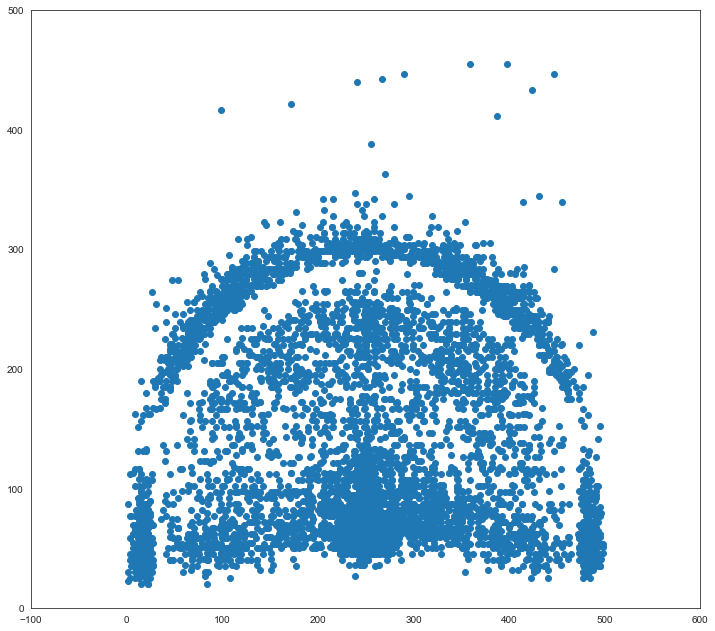

In [228]:
sns.set_style("white")
sns.set_color_codes()
plt.figure(figsize=(12,11))
plt.scatter(full_df.LOC_X, full_df.LOC_Y)
plt.axis([-100, 600, 0, 500])
plt.show()

In [229]:
from matplotlib.patches import Circle, Rectangle, Arc

def draw_court(ax=None, color='black', lw=2, outer_lines=False):
    # If an axes object isn't provided to plot onto, just get current one
    if ax is None:
        ax = plt.gca()

    # Create the various parts of an NBA basketball court

    # Create the basketball hoop
    # Diameter of a hoop is 18" so it has a radius of 9", which is a value
    # 7.5 in our coordinate system
    hoop = Circle((250, 50), radius=7.5, linewidth=lw, color=color, fill=False)

    # Create backboard
    backboard = Rectangle((220, 42.5), 60, -1, linewidth=lw, color=color)

    # The paint
    # Create the outer box 0f the paint, width=16ft, height=19ft
    outer_box = Rectangle((170, 3.5), 160, 190, linewidth=lw, color=color,
                          fill=False)
    # Create the inner box of the paint, widt=12ft, height=19ft
    inner_box = Rectangle((190, 3.5), 120, 190, linewidth=lw, color=color,
                          fill=False)

    # Create free throw top arc
    top_free_throw = Arc((250, 192.5), 120, 120, theta1=0, theta2=180,
                         linewidth=lw, color=color, fill=False)
    # Create free throw bottom arc
    bottom_free_throw = Arc((250, 192.5), 120, 120, theta1=180, theta2=0,
                            linewidth=lw, color=color, linestyle='dashed')
    # Restricted Zone, it is an arc with 4ft radius from center of the hoop
    restricted = Arc((250, 50), 80, 80, theta1=0, theta2=180, linewidth=lw,
                     color=color)

    # Three point line
    # Create the side 3pt lines, they are 14ft long before they begin to arc
    corner_three_a = Rectangle((30, 3.5), 0, 140, linewidth=lw,
                               color=color)
    corner_three_b = Rectangle((470, 3.5), 0, 140, linewidth=lw, color=color)
    # 3pt arc - center of arc will be the hoop, arc is 23'9" away from hoop
    # I just played around with the theta values until they lined up with the 
    # threes
    three_arc = Arc((250, 50), 475, 475, theta1=22, theta2=158, linewidth=lw,
                    color=color)

    # Center Court
    center_outer_arc = Arc((250, 470), 120, 120, theta1=180, theta2=0,
                           linewidth=lw, color=color)
    center_inner_arc = Arc((250, 470), 40, 40, theta1=180, theta2=0,
                           linewidth=lw, color=color)

    # List of the court elements to be plotted onto the axes
    court_elements = [hoop, backboard, outer_box, inner_box, top_free_throw,
                      bottom_free_throw, restricted, corner_three_a,
                      corner_three_b, three_arc, center_outer_arc,
                      center_inner_arc]

    if outer_lines:
        # Draw the half court line, baseline and side out bound lines
        outer_lines = Rectangle((0, 3.5), 500, 470, linewidth=lw,
                                color=color, fill=False)
        court_elements.append(outer_lines)

    # Add the court elements onto the axes
    for element in court_elements:
        ax.add_patch(element)

    return ax

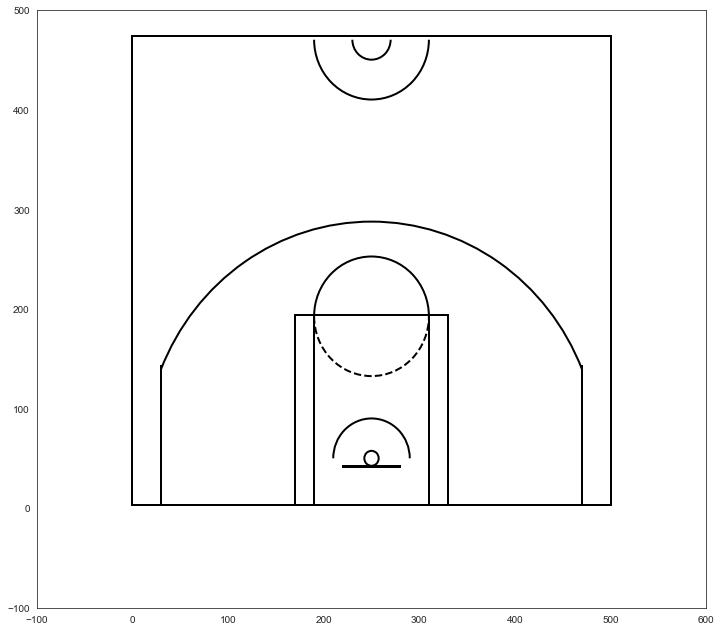

In [230]:
plt.figure(figsize=(12,11))
draw_court(outer_lines=True)
plt.xlim(-100,600)
plt.ylim(-100,500)
plt.show()

In [231]:
color_dict = dict({'MISSED': 'blue',
                  'SCORED': 'red',
                  'BLOCKED': 'green'})

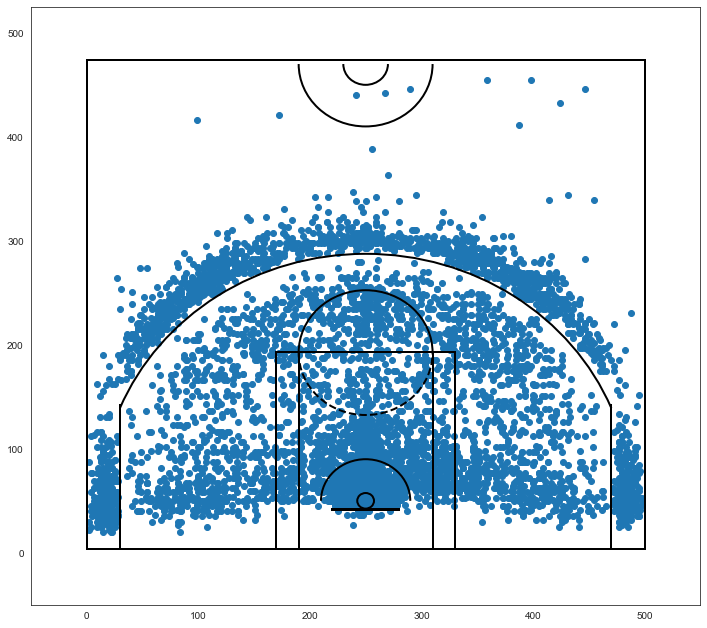

In [232]:
plt.figure(figsize=(12,11))
plt.scatter(full_df.LOC_X, full_df.LOC_Y)
draw_court(outer_lines=True)
# Descending values along the axis from left to right
plt.xlim(-50,550)
plt.ylim(-50,525)

# plt.xlim(-50,550)
# plt.ylim(-50,940)
plt.show()

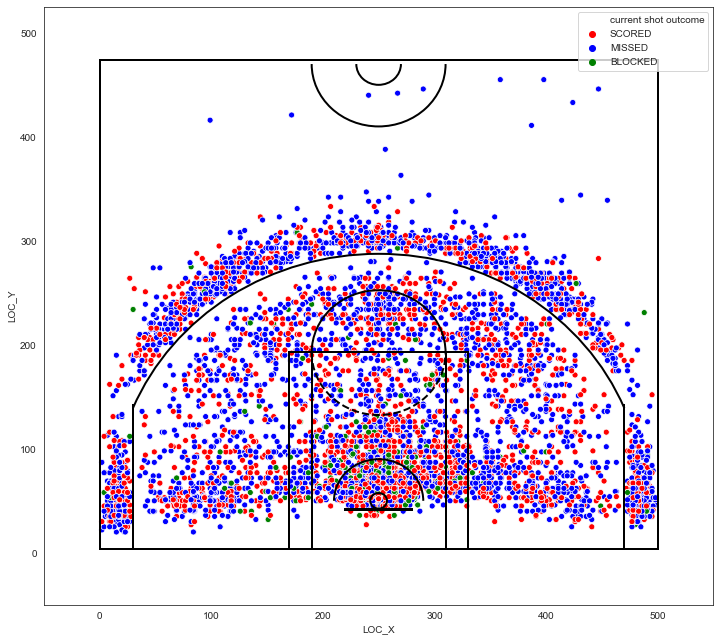

In [233]:
color_dict = dict({'MISSED': 'blue',
                  'SCORED': 'red',
                  'BLOCKED': 'green'})

plt.figure(figsize=(12,11))
sns.scatterplot(x="LOC_X", y="LOC_Y", hue="current shot outcome",
              data=full_df, palette=color_dict, 
                   legend='full')

draw_court(outer_lines=True)
# Descending values along the axis from left to right
plt.xlim(-50,550)
plt.ylim(-50,525)
plt.show()

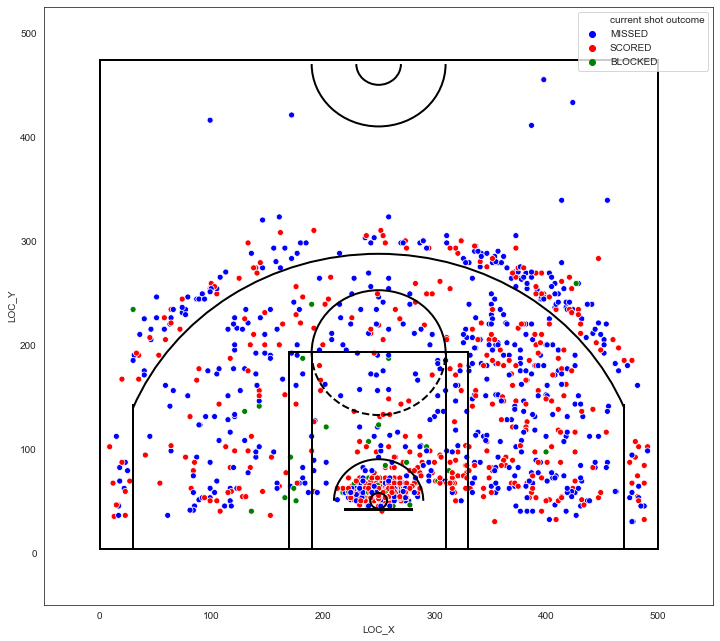

In [245]:
jb = full_df[full_df.shooter == "Jimmy Butler"]

color_dict = dict({'MISSED': 'blue',
                  'SCORED': 'red',
                  'BLOCKED': 'green'})

plt.figure(figsize=(12,11))
sns.scatterplot(x="LOC_X", y="LOC_Y", hue="current shot outcome",
              data=jb, palette=color_dict, 
                   legend='full')
draw_court(outer_lines=True)
# Descending values along the axis from left to right
plt.xlim(-50,550)
plt.ylim(-50,525)

plt.savefig('jimmy.png')
plt.show()



<Figure size 432x288 with 0 Axes>

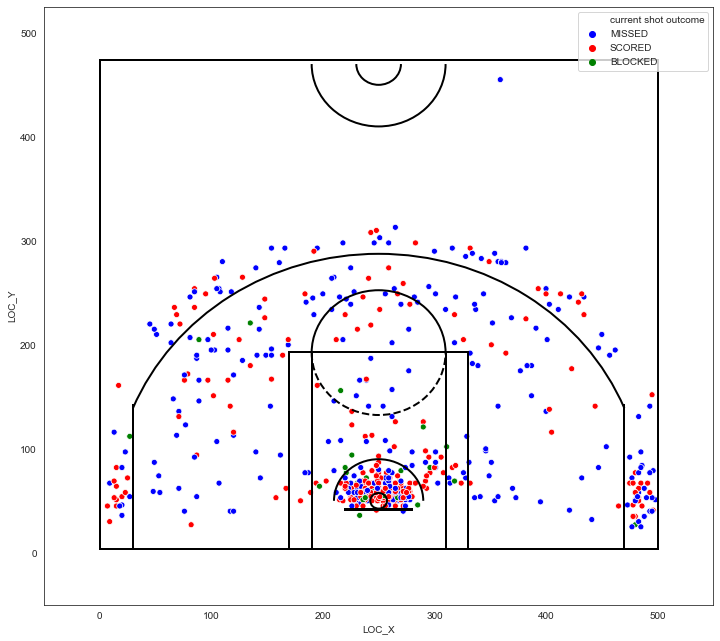

In [246]:
rr = full_df[full_df.shooter == "Rajon Rondo"]

color_dict = dict({'MISSED': 'blue',
                  'SCORED': 'red',
                  'BLOCKED': 'green'})

plt.figure(figsize=(12,11))
sns.scatterplot(x="LOC_X", y="LOC_Y", hue="current shot outcome",
              data=rr, palette=color_dict, 
                   legend='full')
draw_court(outer_lines=True)
# Descending values along the axis from left to right
plt.xlim(-50,550)
plt.ylim(-50,525)


plt.savefig('rondo.png')

plt.show()


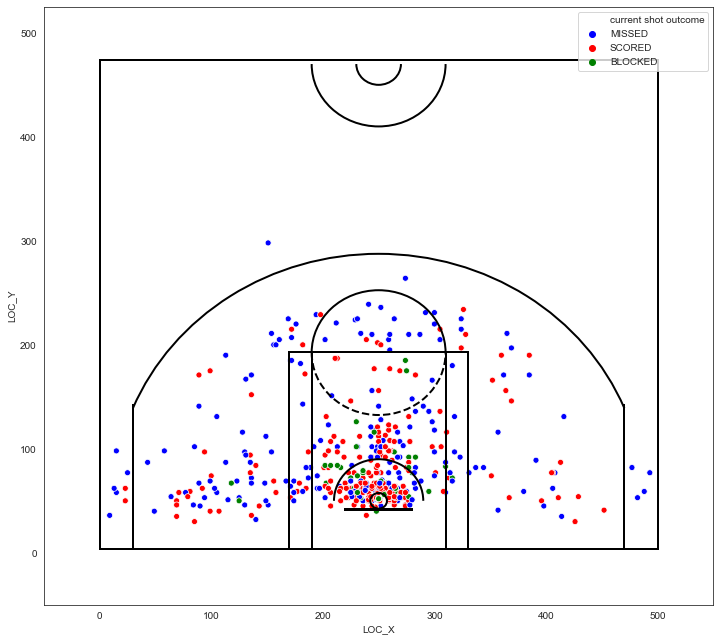

In [247]:
tg = full_df[full_df.shooter == "Taj Gibson"]

color_dict = dict({'MISSED': 'blue',
                  'SCORED': 'red',
                  'BLOCKED': 'green'})

plt.figure(figsize=(12,11))
sns.scatterplot(x="LOC_X", y="LOC_Y", hue="current shot outcome",
              data=tg, palette=color_dict, 
                   legend='full')
draw_court(outer_lines=True)
# Descending values along the axis from left to right
plt.xlim(-50,550)
plt.ylim(-50,525)

plt.savefig('Taj_Gibson.png')
plt.show()



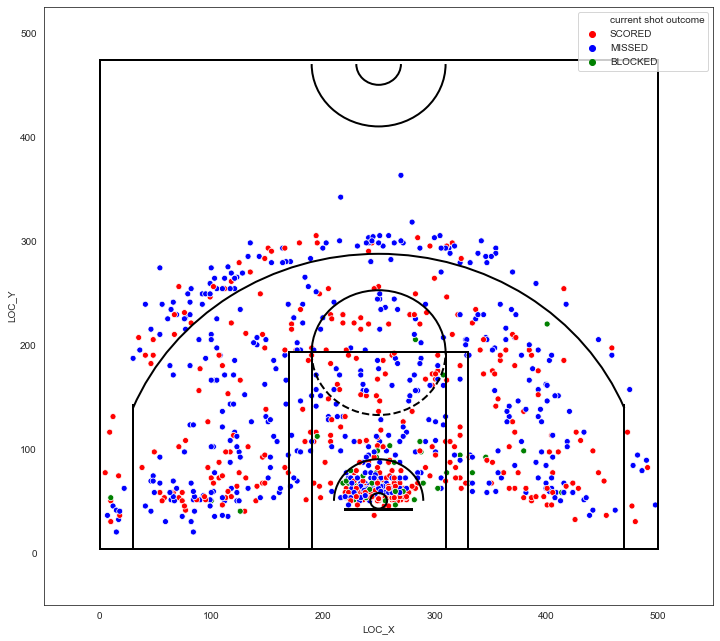

In [248]:
dw = full_df[full_df.shooter == "Dwyane Wade"]

color_dict = dict({'MISSED': 'blue',
                  'SCORED': 'red',
                  'BLOCKED': 'green'})

plt.figure(figsize=(12,11))
sns.scatterplot(x="LOC_X", y="LOC_Y", hue="current shot outcome",
              data=dw, palette=color_dict, 
                   legend='full')
draw_court(outer_lines=True)
# Descending values along the axis from left to right
plt.xlim(-50,550)
plt.ylim(-50,525)

plt.savefig('Dwyane Wade.png')
plt.show()




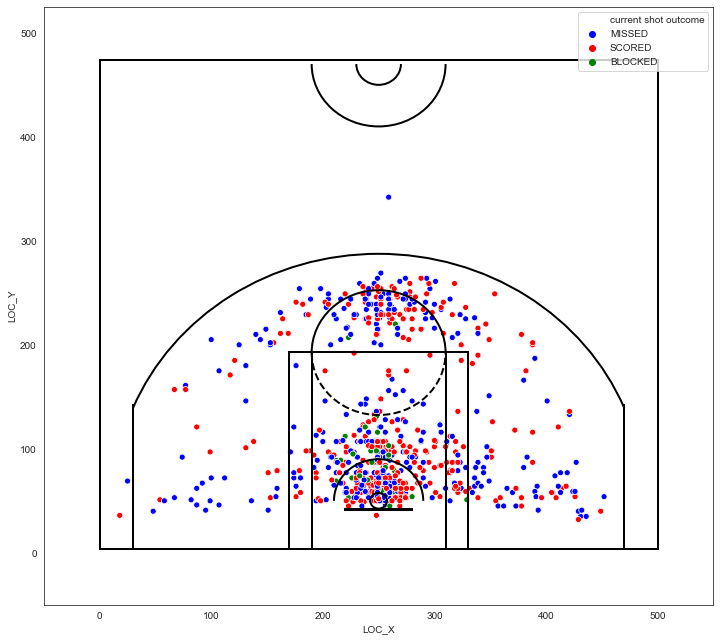

In [249]:
rl = full_df[full_df.shooter == "Robin Lopez"]

color_dict = dict({'MISSED': 'blue',
                  'SCORED': 'red',
                  'BLOCKED': 'green'})

plt.figure(figsize=(12,11))
sns.scatterplot(x="LOC_X", y="LOC_Y", hue="current shot outcome",
              data=rl, palette=color_dict, 
                   legend='full')
draw_court(outer_lines=True)
# Descending values along the axis from left to right
plt.xlim(-50,550)
plt.ylim(-50,525)

plt.savefig('Robin_Lopez.png')
plt.show()



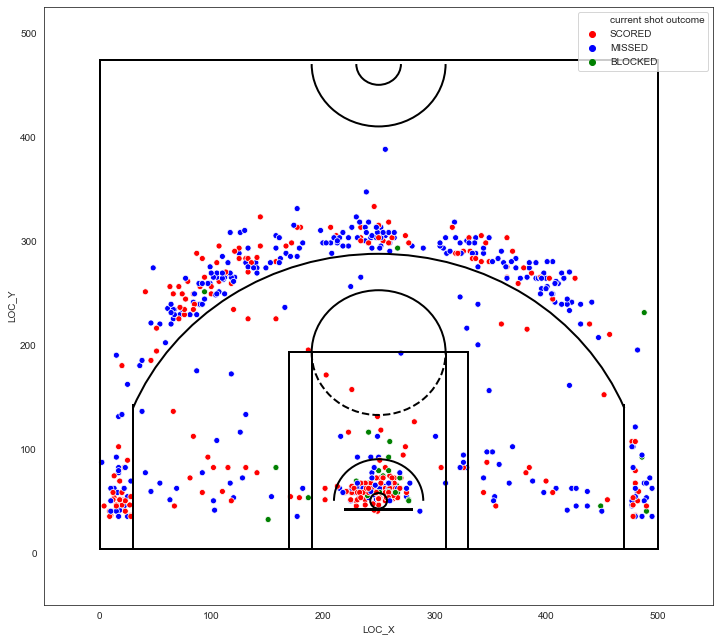

In [250]:
nm = full_df[full_df.shooter == "Nikola Mirotic"]

color_dict = dict({'MISSED': 'blue',
                  'SCORED': 'red',
                  'BLOCKED': 'green'})

plt.figure(figsize=(12,11))
sns.scatterplot(x="LOC_X", y="LOC_Y", hue="current shot outcome",
              data=nm, palette=color_dict, 
                   legend='full')
draw_court(outer_lines=True)
# Descending values along the axis from left to right
plt.xlim(-50,550)
plt.ylim(-50,525)


plt.savefig('Nikola_Mirotic.png')
plt.show()

